Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Import Dataset & Libraries

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

Load Dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
x = test_data
y = test_labels.flatten()

170500096/170498071 [==============================] - 4s 0us/step


Show Summary of Data & Plot few Images



Training Shape,
Data:  (50000, 32, 32, 3)
Labels:  (50000, 1)

Testing Shape,
Data:  (10000, 32, 32, 3)
Labels:  (10000, 1)


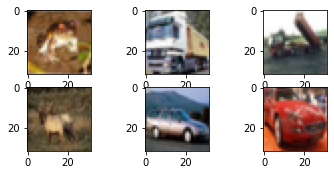

In [ ]:
print("Training Shape,")
print("Data: ",train_data.shape)
print("Labels: ",train_labels.shape)
print("\nTesting Shape,")
print("Data: ",test_data.shape)
print("Labels: ",test_labels.shape)

for i in range (6):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_data[i])
plt.show()

Preprocessing Data

In [ ]:
train_norm = train_data.astype('float32')
test_norm = test_data.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Define CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

Fit Model

In [ ]:
f = model.fit(train_data, train_labels, epochs=100, batch_size=100, validation_data=(test_data, test_labels), verbose=1)

Epoch 1/100
500/500 [==============================] - 6s 12ms/step - loss: 2.3362 - accuracy: 0.2616 - val_loss: 1.6096 - val_accuracy: 0.4241
Epoch 2/100
500/500 [==============================] - 6s 12ms/step - loss: 1.7793 - accuracy: 0.3739 - val_loss: 1.4456 - val_accuracy: 0.4815
Epoch 3/100
500/500 [==============================] - 6s 12ms/step - loss: 1.5582 - accuracy: 0.4345 - val_loss: 1.3622 - val_accuracy: 0.5085
Epoch 4/100
500/500 [==============================] - 6s 12ms/step - loss: 1.4461 - accuracy: 0.4759 - val_loss: 1.3356 - val_accuracy: 0.5233
Epoch 5/100
500/500 [==============================] - 6s 12ms/step - loss: 1.3601 - accuracy: 0.5068 - val_loss: 1.2670 - val_accuracy: 0.5441
Epoch 6/100
500/500 [==============================] - 6s 12ms/step - loss: 1.3040 - accuracy: 0.5306 - val_loss: 1.2063 - val_accuracy: 0.5656
Epoch 7/100
500/500 [==============================] - 6s 12ms/step - loss: 1.2465 - accuracy: 0.5498 - val_loss: 1.1462 - val_accuracy:

Plot Model Stats

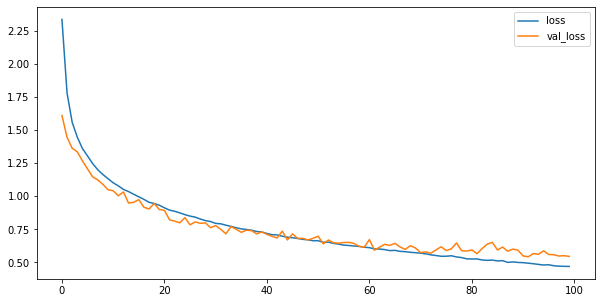

In [ ]:
# Loss
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(f.history['loss'], label='loss')
plt.plot(f.history['val_loss'], label='val_loss')
plt.legend()

(10000, 10)


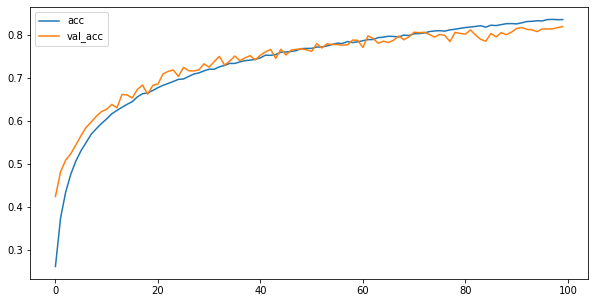

In [ ]:
# Accuracy
plt.plot(f.history['accuracy'], label='acc')
plt.plot(f.history['val_accuracy'], label='val_acc')
plt.legend()
print(test_labels.shape)

Evaluate Model on Test Data & Print Results

In [ ]:
a, b = model.evaluate(test_data, test_labels, verbose=1)
print('Test Set Accuracy> %.2f' % (b * 100.0))
p_test = model.predict(x).argmax(axis=1)
print("Confusion matrix")
print(confusion_matrix(y, p_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.5455 - accuracy: 0.8187
Test Set Accuracy> 81.87
Confusion matrix
[[781   9  32  20  27   4   7  11  65  44]
 [  9 877   1   3   3   3   7   2  17  78]
 [ 45   1 671  27  91  61  83  10   9   2]
 [  8   3  39 597  67 166  80  21  13   6]
 [  6   2  25  19 855  23  43  26   1   0]
 [  4   0  16 103  54 777  18  23   1   4]
 [  3   0  20  16  19  11 928   1   2   0]
 [  6   0  14  12  55  46   6 852   2   7]
 [ 28  12   2   5   3   0   7   4 924  15]
 [ 19  21   2   6   1   2   5   5  14 925]]


Save Model

In [ ]:
model.save('/content/drive/My Drive/final_model.h5')